# IS883 Week 1: Basic ML and Language Modeling





1. Use Google Colab for this assignment.

2. **You are allowed to use ChatGPT for this assignment. However, as per the syllabus, you are required to cite your usage and submit the prompts and responses used as a PDF file. You are also responsible for understanding the solution and defending it when asked in class.**

3. For each question, fill in the answer in the cell(s) right below it. The answer could be code or text. You can add as many cells as you need for clarity.

4. Enter your BUID (only numerical part) below.

5. **Your submission on Blackboard should be the downloaded notebook (i.e., ipynb file). It should be prepopulated with your solution (i.e., the TA and/or instructor need not rerun the notebook to inspect the output). The code, when executed by the TA and/or instructor, should run with no runtime errors.**

# Part 1: Pre-class Work

## 1.1 Setup

In [2]:
BUID = 123456 #e.g., 123456 ONLY NUMERICAL PART

 Machine learning is generally stochastic, meaning you get different results for different runs. To avoid that, you can "seed" your code. This code uses your BU id (only the numeric part) as a seed for all random number generators.

In [3]:
import random
import numpy as np
import torch

# Set a seed for the built-in Python random module
random.seed(BUID)
# Set a seed for NumPy
np.random.seed(BUID)

In this part, we will be working with medical data to profile patients with diabetes.

## 1.2 Diabetes Dataset loading



We will first download and take a look at the Kaggle diabetes dataset. The dataset has patient profiles and whether they have diabetes encoded in the `Outcome` columns.

In [4]:
!pip install kaggle
!kaggle datasets download -d mathchi/diabetes-data-set
!unzip /content/diabetes-data-set.zip

Dataset URL: https://www.kaggle.com/datasets/mathchi/diabetes-data-set
License(s): CC0-1.0
  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 12.1MB/s]
Archive:  /content/diabetes-data-set.zip
  inflating: diabetes.csv            


In [5]:
import pandas as pd
from IPython.display import display


# Load the dataset using the downloaded csv file
df = pd.read_csv('/content/diabetes.csv')

# Display the dataset head of the dataset
display(df.head())

# Display the statistics of the table
display(df.describe())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000




## 1.3 Using Decision Trees



Now, let's see if we can learn a useful model from this data. Given a patient's profile, we want to predict accurately whether they have diabetes. In this notebook, you will use a [decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

  Your task is to:

   1. Split the data into training and testing. You may refer to [this link](https://www.geeksforgeeks.org/pandas-create-test-and-train-samples-from-dataframe/) for help. Use 80% of the data for training, and the rest for testing. __(10 points)__

2. Train the tree over the training data. __(5 points)__

3. Report the accuracy over both the training and test sets. __(5 points)__

    
  Let's start with a decision tree that has a depth of 5 (i.e., the tree asks a maximum of 4 questions before reaching a conclsion).


In [6]:
from sklearn.model_selection import train_test_split


### Split the dataframe into df_train nd df_test.
df_train, df_test = train_test_split(df, test_size=0.2, random_state=BUID)

### Split each of df_train and df_test by column into an input table and an outcome table.
df_train_input = df_train.drop('Outcome', axis=1)
df_train_outcome = df_train['Outcome']
df_test_input = df_test.drop('Outcome', axis=1)
df_test_outcome = df_test['Outcome']

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

depth = 5

## Create the decision tree
model = DecisionTreeClassifier(max_depth=depth, random_state=BUID)

## fit the model to the training data
model.fit(df_train_input, df_train_outcome)


DecisionTreeClassifier(max_depth=5, random_state=123456)

4. What is the accuracy of the model on both the training and test sets? __(5 points)__

In [8]:
## get accuracy on both training and test data.
train_predictions = model.predict(df_train_input)
test_predictions = model.predict(df_test_input)
print("training accuracy  =", accuracy_score(df_train_outcome, train_predictions))
print("test accuracy  =", accuracy_score(df_test_outcome, test_predictions))

training accuracy  = 0.8322475570032574
test accuracy  = 0.7077922077922078


Now, use the next cell to write code that creates 10 decision tress with different sizes (i.e., depths between 1 and 10, inclusive).

  5. Using a loop, train these different trees. Save their training and test accuracies. __(10 points)__

  6. Plot the training and test accuracies as two lines, with the x axis as the tree depth. Format your plot properly with legends and colors. __(5 points)__

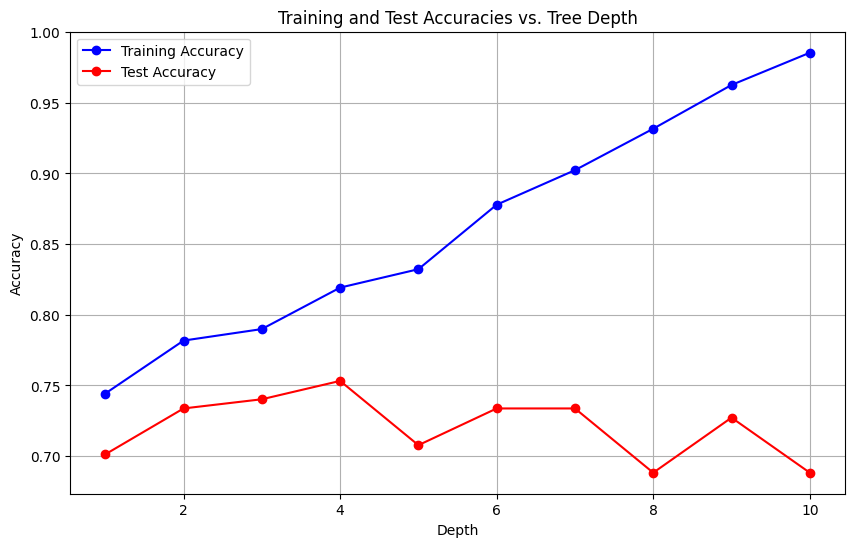

In [9]:
import matplotlib.pyplot as plt

train_accurcies = []
test_accuracies = []
clfs= []


## Train and save the accuracies of multiple trees in a loop.
range_of_depths = range(1,11)
for depth in range_of_depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=BUID)
    model.fit(df_train_input, df_train_outcome)

    train_predictions = model.predict(df_train_input)
    test_predictions = model.predict(df_test_input)
    train_accurcies = train_accurcies + [accuracy_score(df_train_outcome, train_predictions)]
    test_accuracies = test_accuracies + [accuracy_score(df_test_outcome, test_predictions)]
    clfs=clfs+[model]


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range_of_depths, train_accurcies, label='Training Accuracy', color='blue', marker='o')
plt.plot(range_of_depths, test_accuracies, label='Test Accuracy', color='red', marker='o')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracies vs. Tree Depth')
plt.legend()
plt.grid(True)
plt.show()

Let's visualize some of the trees. You may adjust `depth_to_visualize`to pick the depth of the tree you want to visualize

In [10]:
from sklearn import tree
import matplotlib.pyplot as plt

depth_to_visualize = 9

plt.figure(figsize=(40, 30), dpi=300)
tree.plot_tree(clfs[depth_to_visualize-1], filled=True, feature_names=df_train_input.columns, class_names=['No', 'Yes'])

[Text(0.4895296391752577, 0.95, 'Glucose <= 127.5\ngini = 0.44\nsamples = 614\nvalue = [413, 201]\nclass = No'),
 Text(0.2029639175257732, 0.85, 'Age <= 28.5\ngini = 0.299\nsamples = 404\nvalue = [330, 74]\nclass = No'),
 Text(0.09020618556701031, 0.75, 'BMI <= 45.4\ngini = 0.139\nsamples = 226\nvalue = [209, 17]\nclass = No'),
 Text(0.05670103092783505, 0.65, 'BMI <= 30.95\ngini = 0.118\nsamples = 222\nvalue = [208, 14]\nclass = No'),
 Text(0.020618556701030927, 0.55, 'DiabetesPedigreeFunction <= 0.672\ngini = 0.015\nsamples = 129\nvalue = [128, 1]\nclass = No'),
 Text(0.010309278350515464, 0.45, 'gini = 0.0\nsamples = 116\nvalue = [116, 0]\nclass = No'),
 Text(0.030927835051546393, 0.45, 'DiabetesPedigreeFunction <= 0.686\ngini = 0.142\nsamples = 13\nvalue = [12, 1]\nclass = No'),
 Text(0.020618556701030927, 0.35, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes'),
 Text(0.041237113402061855, 0.35, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]\nclass = No'),
 Text(0.092783505154639

# Part 2: In-class Work

## 2.1 Reflective Questions

1. From the figure in 1.3.6, can you identify which models are overfitting, underfitting, or fit well? Elaborate.

2. what does the depth reflect in machine learning lingo as discussed in class? Elaborate.

**Answers**

- depth < 4: underfitting: Both errors are high.
- depth = 4: best fit: lowest test error.
- depth > 4: overfitting: Test error is high but train error is low.

- The depth of the tree reflects the complexity of the model. More accurately, deeper trees geenrally have more leaves, which means the model has a higher number of parameters.

## 2.2 Diagnosing Diabetes with Neural Networks

1. Now, we will use a [neural network](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) to model the data.

  - Design your MLP architecture to be compatible with the input/output format.
  - Perform any necessary data pre-processing using `StandardScaler`.
  - Create and train an MLP that fits your model well. You will have to make decisions including the size of the model and other hyper-parameters (e.g., the learning rate).

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

### Data preprocessing
scaler = StandardScaler()
df_train_input_scaled = scaler.fit_transform(df_train_input)
df_test_input_scaled = scaler.fit_transform(df_test_input)

### Create the MLP
mlp = MLPClassifier(hidden_layer_sizes=(50,), activation='relu', solver='sgd', learning_rate_init=0.001, max_iter=20000, random_state=BUID)

### Train the MLP
mlp.fit(df_train_input_scaled, df_train_outcome)


### Evaluation
train_score = mlp.score(df_train_input_scaled, df_train_outcome)
test_score = mlp.score(df_test_input_scaled, df_test_outcome)

print(f"Training accuracy: {train_score:.4f}")
print(f"Test accuracy: {test_score:.4f}")


Training accuracy: 0.7834
Test accuracy: 0.7662


## 2.3 Reflective Questions

1. How did you arrive to the conclusion that your model is a good fit?
2. Is your neural network result better or worse than the best decision tree you got? Explain how you reached that conclusion.

**Answers**

- hyper-parameter decisions can be made based on trial-and-error. One can try multiple different values for hyper-parameters and see where the sweet spot in *terms of test accuracy* for being a "good fit" is.
-  Through comparing the *test* accuracies/errors for both models, The MLP is better than the decision tree.

## 2.4 The Effect of Data Size

3. Let's go back to our best decision tree found in 1.3.6 but change one thing: What if we decide to only use 20% of the original data for training, and the rest for testing? How does that change the results? What is the explanation behind this change?

In [12]:
### Split df into df_train and df_test.
df_train, df_test = train_test_split(df, test_size=0.8, random_state=BUID)

### Split df_train and df_test y column into the input columns and the outcome columns
df_train_input = df_train.drop('Outcome', axis=1)
df_train_outcome = df_train['Outcome']
df_test_input = df_test.drop('Outcome', axis=1)
df_test_outcome = df_test['Outcome']


In [13]:
### Train tree
model = DecisionTreeClassifier(max_depth=4, random_state=BUID)
model.fit(df_train_input, df_train_outcome)

### Get and print scores
train_score = model.score(df_train_input, df_train_outcome)
test_score = model.score(df_test_input, df_test_outcome)

print(f"Training accuracy: {train_score:.4f}")
print(f"Test accuracy: {test_score:.4f}")

Training accuracy: 0.8758
Test accuracy: 0.6764


**Answer**

- The model performs worse because there is less data. The model now is overfitting.

##2.5 Language Modeling with N-grams



Let's focus on language modeling now! In this section, you will create some n-grams and experiment with how they work.

### 2.5.1 Setup

Use `nltk` to a 2-gram (i.e., bigram). Extract the bigrams in the sentence

> This is a sample sentence.

In [14]:
!pip install nltk
import nltk
# Ensure you have the tokenizers
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
import nltk
from nltk.util import ngrams

sentence = "This is a sample sentence."

n = 2

### Get the tokens of the sentence.
tokens = nltk.word_tokenize(sentence)

### Create the bigram model
bigrams = list(ngrams(tokens, n))

# Print the bigrams
print(bigrams)



[('This', 'is'), ('is', 'a'), ('a', 'sample'), ('sample', 'sentence'), ('sentence', '.')]


### 2.5.2 Creating an N-gram Based on a Text Corpus.

Using [this functionality](https://www.nltk.org/api/nltk.lm.api.html) in `nltk`, Create a bigram based on the following dataset of sentences:

        - to be or not to be. that is the question!
        - ask not what your country can do for you. Ask what you can do for your country.
        - is this the real life? is this just fantasy?

1. Show the bigram you have constructed (i.e., the dictionary).
2. Generate 10 new sentences. What do you notice about these sentences? Explain what's interesting about your observation(s).

In [16]:
sentences = [
    "To be or not to be. that is the question!",
    "Ask not what your country can do for you. Ask what you can do for your country.",
    "Is this the real life? is this just fantasy?"
]

In [17]:
from nltk.lm import MLE
from nltk.lm.preprocessing import padded_everygram_pipeline

### tokenize the sentences and put them in a list.
tokenized_text = [nltk.word_tokenize(sentence) for sentence in sentences]

# prepare the data using padded_everygram_pipeline
train_data, padded_sents = padded_everygram_pipeline(n, tokenized_text)

### train the model
model = MLE(n)
model.fit(train_data, padded_sents)

Let's print the frequencies of the different n-grams.

In [18]:
from collections import Counter

ngrams_freq = Counter()

train_data, padded_sents = padded_everygram_pipeline(n, tokenized_text)

for ngram in train_data:
    ngrams_freq.update(ngram)

# Display n-grams and their frequencies
print("N-grams and their frequencies:")
for ngram, freq in ngrams_freq.items():
    print(f"{ngram}: {freq}")

N-grams and their frequencies:
('<s>',): 3
('<s>', 'To'): 1
('To',): 1
('To', 'be'): 1
('be',): 2
('be', 'or'): 1
('or',): 1
('or', 'not'): 1
('not',): 2
('not', 'to'): 1
('to',): 1
('to', 'be'): 1
('be', '.'): 1
('.',): 3
('.', 'that'): 1
('that',): 1
('that', 'is'): 1
('is',): 2
('is', 'the'): 1
('the',): 2
('the', 'question'): 1
('question',): 1
('question', '!'): 1
('!',): 1
('!', '</s>'): 1
('</s>',): 3
('<s>', 'Ask'): 1
('Ask',): 2
('Ask', 'not'): 1
('not', 'what'): 1
('what',): 2
('what', 'your'): 1
('your',): 2
('your', 'country'): 2
('country',): 2
('country', 'can'): 1
('can',): 2
('can', 'do'): 2
('do',): 2
('do', 'for'): 2
('for',): 2
('for', 'you'): 1
('you',): 2
('you', '.'): 1
('.', 'Ask'): 1
('Ask', 'what'): 1
('what', 'you'): 1
('you', 'can'): 1
('for', 'your'): 1
('country', '.'): 1
('.', '</s>'): 1
('<s>', 'Is'): 1
('Is',): 1
('Is', 'this'): 1
('this',): 2
('this', 'the'): 1
('the', 'real'): 1
('real',): 1
('real', 'life'): 1
('life',): 1
('life', '?'): 1
('?',): 2
(

Now, let's generate some sentences with these n-grams!

In [19]:
def generate_sentence(model, num_words=15, start="to"):
    content = []
    current_word = start

    for _ in range(num_words):
        ### update the prefix
        content.append(current_word)

        ### Generate the next word based on the last n-1 word
        prefix = content[-(n-1):]
        current_word = model.generate(text_seed=prefix)

        # if "end of sentence" is reached, exit
        if current_word == '</s>':
            break

    # Convert the list of words into a string.
    return ' '.join(content)


In [20]:
num_sentences = 10
start_word = "Ask"

for i in range(num_sentences):
    print(f"Sentence {i + 1}:")
    print(generate_sentence(model, 15, start=start_word))
    print("------")



Sentence 1:
Ask what you can do for you can do for you can do for you
------
Sentence 2:
Ask what you . that is the real life ? is the real life ?
------
Sentence 3:
Ask not to be .
------
Sentence 4:
Ask what your country .
------
Sentence 5:
Ask not to be . that is the real life ? is this just fantasy
------
Sentence 6:
Ask what you .
------
Sentence 7:
Ask what your country . Ask what your country can do for your country can
------
Sentence 8:
Ask not to be .
------
Sentence 9:
Ask not to be or not what your country .
------
Sentence 10:
Ask not what your country .
------


**Answers**

- We notice that
    - The output varies every run (It is stochastic).
    - Because Bigrams are too short, they do not exploit much context, leading to non-sensical sentences that may be repetitive.

Now, you will read the file `https://raw.githubusercontent.com/elhamod/IS883/main/Assignments/Week1/IS883_Week1_bustlingcity.txt`. You will create multiple __n-grams__, where n ={2, 3, 4, 5, 10}. You will then, using each n-gram, generate a text of similar length to the original file.

3. Compare the different generated texts. What observations do you make? Explain your observations with examples. __(0.5 points)__

In [21]:
import requests

## Read the text
url = "https://raw.githubusercontent.com/elhamod/IS883/main/Assignments/Week1/IS883_Week1_bustlingcity.txt"
response = requests.get(url)
text_content = response.text

# print the original text
print("original text:")
print(text_content)
print("--------")



original text:
In the heart of the bustling city, there is a park. The park is not just any park; it is a park of dreams. Dreams that come alive every morning as people gather here, each with their unique aspirations and stories. 

Under the shade of an ancient oak tree, children play. Their laughter and innocent chatter fill the air. They chase butterflies, imagining they are on an epic adventure. To them, the park is a playground of infinite possibilities.

Near the serene pond, a young writer sits on a weathered bench. The park is her refuge, a place where she finds inspiration among the dancing ripples of the water. She observes the ducks and swans, penning down verses that capture the essence of the natural world.

A group of elderly folks assembles by the chess tables, eager for their daily match. Here, the park transforms into a battlefield of strategic thinking and camaraderie. Every move is a calculated decision, and every game tells a different story.

As the sun sets, the pa

In [22]:
for n in [2, 3, 4, 5, 10]:
  print("n =", n)

  ### tokenize the paragraph
  tokenized_text = nltk.word_tokenize(text_content)

  # prepare the data using padded_everygram_pipeline
  train_data, padded_sents = padded_everygram_pipeline(n, [tokenized_text])

  ### train the model
  model = MLE(n)
  model.fit(train_data, padded_sents)

  start_word = "<s>" # start a new sentence
  generated_text = generate_sentence(model, len(tokenized_text), start=start_word)
  print(generated_text)
  print("----------")

n = 2
<s> In the natural world . Couples stroll hand in its multifaceted nature . As the day and swans , competition , conjures a place where she finds inspiration among the day and experiences . Under the serene pond , the park of the bustling city , penning down verses that come alive every game tells a park is a place where she finds inspiration among the dancing ripples of strategic thinking and innocent chatter fill the essence of strategic thinking and stolen kisses . His guitar strums and stolen kisses . Near the shade of infinite possibilities . Couples stroll hand , a playground of the park transforms into a calculated decision , sharing whispered secrets and night , the serene pond , in hand , '' which countless stories are painted , in hand , a single word – `` park reveals its different story . The park . The park of an epic adventure . The park is a weathered bench .
----------
n = 3
<s> <s> In the heart of the natural world . A group of elderly folks assembles by the ches

**Answer**

- As the context becomes larger, we generate exact repititions of the training data because the model is too complex and simply memorizes the data.
- When the context is too short, the model is able to generate diverse long texts but could be non-sensical due to lack of context.


# Part 3: Homework

## 3.1 Right-to-Left Language Modeling

1. Now, that you have experimented with ngrams, construct a __"reveresed n-gram"__. Meaning, you will construct n-grams that take right-to-left context (i.e., start with the last word and predict backwards).   __(10 points)__

2. How does the quality of the reverse-generated text compare to that generated using vanilla n-grams in 2.5.1.3? Comment and explain with examples.  __(10 points)__

In [ ]:
print("original text:")
print(text_content)
print("--------")

for n in [2,3,4,5,10]:
  print("n =", n)

  ### tokenize the "reversed" sentences

  # prepare the data using padded_everygram_pipeline

  # train the model

  # print


**Answer**
#### Provide your answers here







3. Finally, [calculate the perplexity](https://www.nltk.org/api/nltk.lm.api.html) of the following sentences for the original `n in [2,3,4,5]` models in 2.5.1.3 (i.e., not including the reverse models). __(10 points)__

4. Comment on the results and elaborate on your findings.  __(10 points)__

 > In the heart of the bustling city,

 > There is a park. The park is beautiful.

In [ ]:
def calculate_perplexity():

In [ ]:
for n in [2,3,4,5]:

  ### tokenize the "reversed" sentences

  # prepare the data using padded_everygram_pipeline

  ### Create and train the model

  ### print


**Answer**
#### Provide your answers here


## 3.2 AI Legal Assistant



In order to measure how well machine learning could be used for legal assistance, the bar association has hired you to curate a dataset of a large corpora of legal documents for training and testing different machine learning models. Once the dataset is curated [(e.g. this)](https://www.kaggle.com/datasets/anudit/india-legal-cases-dataset), many researchers and practitioners will bid and use the publicized dataset to demonstrate the superiority of their model.

1. Can you think of a potential issue with such a practice in terms of model quality? __(5 points)__
2. Can you suggest remedies that are easy to implement for such issue(s)? __(5 points)__

**Answers**

#### Provide your answers here

## 3.3 Different Split, Different Results?

Going back to 1.3, you were told to use a different train/test split. The analysts at your company provided you with two new csv files: [One for training](https://raw.githubusercontent.com/elhamod/IS883/main/Assignments/Week1/IS883_Week1_newpatients2.csv), and [one for testing](https://raw.githubusercontent.com/elhamod/IS883/main/Assignments/IS883_Week1_newpatients.csv).

1. Write and run a code that trains and evaluates a decision tree using the new datset. Experiment a bit to get the best performing tree. __(5 points)__
2. How does the new model perform on this new split compared to the results obtained by the best model in 1.3? How did you reach that conclusion? __(5 points)__
3. Can you explain the difference in performance? What is the root cause? Show how you arrived at that conclusion. __(5 points)__
4. Reflect on your results and explain, with an example, how such a discrepancy can occur in a real-world scenario. What are the consequences? What are the potential remedies? __(5 points)__

In [ ]:
import pandas as pd

# Load the files into training and test dataframes
df_train = pd.read_csv('https://raw.githubusercontent.com/elhamod/IS883/main/Assignments/Week1/IS883_Week1_newpatients2.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/elhamod/IS883/main/Assignments/Week1/IS883_Week1_newpatients.csv')

display(df_train.describe())
display(df_test.describe())

In [ ]:
### Split both df_train and df_test by column into the input columns and the outcome columns

### Train the tree

### Get the scores

### Print the scores.


**Answer**
#### Provide your answers here